In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import os

/tmp/ipykernel_4177813/3328854690.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Bounding boxes within chest x-ray14 dataset

Here is an example of how to extract bounding boxes along with their respective x-ray image. 

Things to keep in mind:

* There are many x-rays which do have a bounding box, but also have other disease which does not have a bounding box. Meaning there are some diseases which doesn't have a bounding box, even though they are present in the x-ray -- scroll down to find how many diseases which have unmatching bounding boxes.
* There are also only 8 diseases which have bounding boxes, out of 14 diseases -- scroll down to find how many diseases which have bounding boxes.
* There is only one bounding box per disease, even though there can be multiple instances of the same disease in the x-ray -- scroll down to find how many diseases which have multiple instances of the same disease.
* The bounding box is in the format of (x, y, width, height), where x and y are the coordinates of the top left corner of the box.

In [3]:
root_folder = '/cluster/home/taheeraa/datasets/chestxray-14/'

In [4]:
file_path_bbox = root_folder + 'BBox_List_2017.csv'
df_bbox = pd.read_csv(file_path_bbox)
df_bbox.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [5]:
file_path_data_entry = root_folder + 'Data_Entry_2017.csv'
df_data_entry = pd.read_csv(file_path_data_entry)
df_data_entry.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
merged_df = pd.merge(df_bbox, df_data_entry, on='Image Index', how='inner')
merged_df.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN,Atelectasis,8,13118,69,M,PA,2992,2991,0.143,0.143,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN,Atelectasis|Effusion|Mass,7,14716,53,M,AP,3056,2544,0.139,0.139,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN,Atelectasis,9,29817,67,F,AP,3056,2544,0.139,0.139,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN,Atelectasis|Cardiomegaly|Consolidation,1,14687,51,M,AP,2500,2048,0.168,0.168,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN,Atelectasis,1,17877,75,F,AP,2500,2048,0.168,0.168,NaN


In [7]:
def create_file_index(root_folder):
    """
    Creates a dictionary that maps filenames to their full paths within the root_folder.
    """
    file_index = {}
    for root, _, files in os.walk(root_folder):
        for file in files:
            file_index[file] = os.path.join(root, file)
    return file_index
file_index = create_file_index(root_folder)

In [8]:
def get_file_path(filename, file_index):
    """
    Retrieves the file path from the file index for a given filename.
    """
    return file_index.get(filename, None)

merged_df['File Path'] = merged_df['Image Index'].apply(lambda x: get_file_path(x, file_index))

In [9]:
merged_df.rename(columns={
    'Bbox [x': 'x',
    'h]': 'h',
}, inplace=True)

In [10]:
merged_df.head()

,Image Index,Finding Label,x,y,w,h,Unnamed: 6,Unnamed: 7,Unnamed: 8,Finding Labels,...,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,File Path
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN,Atelectasis,...,13118,69,M,PA,2992,2991,0.143,0.143,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN,Atelectasis|Effusion|Mass,...,14716,53,M,AP,3056,2544,0.139,0.139,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN,Atelectasis,...,29817,67,F,AP,3056,2544,0.139,0.139,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN,Atelectasis|Cardiomegaly|Consolidation,...,14687,51,M,AP,2500,2048,0.168,0.168,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN,Atelectasis,...,17877,75,F,AP,2500,2048,0.168,0.168,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...


In [11]:
merged_df[merged_df['Image Index'] == '00014716_007.png']


,Image Index,Finding Label,x,y,w,h,Unnamed: 6,Unnamed: 7,Unnamed: 8,Finding Labels,...,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,File Path
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN,Atelectasis|Effusion|Mass,...,14716,53,M,AP,3056,2544,0.139,0.139,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...


too keep in mind: there are some bounding boxes which has only one label, while there are several other labels attached to it, 
but they don't have any bbox attached to the label

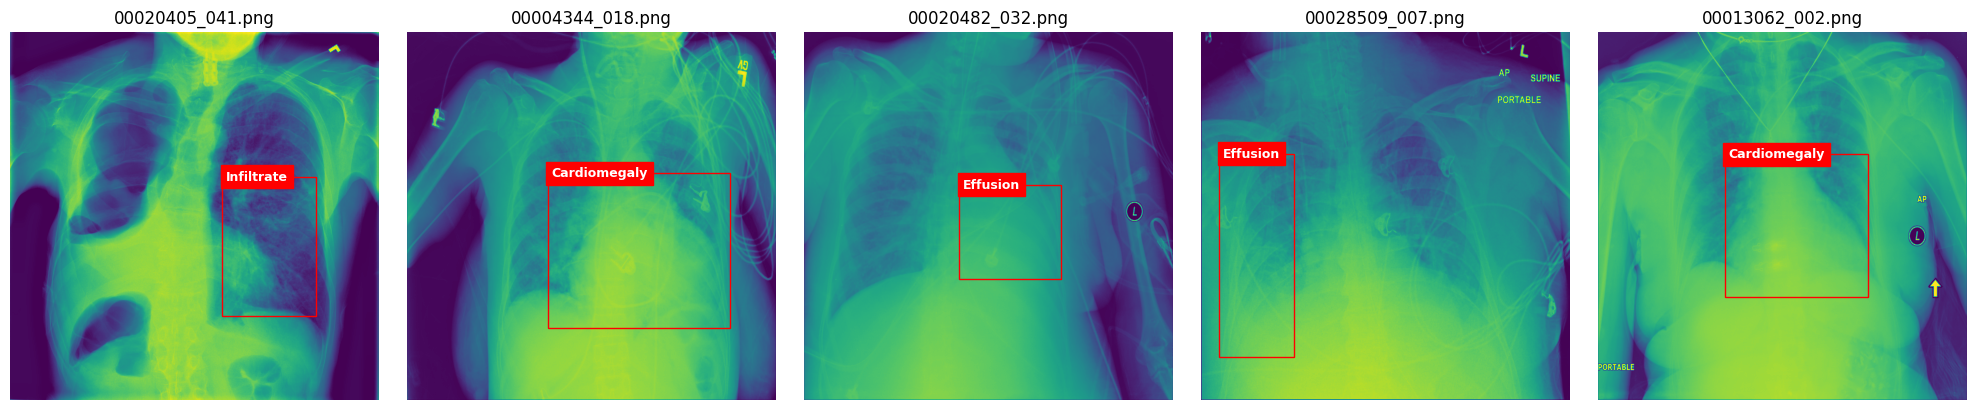

In [12]:
# Sample 5 random rows from the DataFrame
sampled_df = merged_df.sample(n=5)

fig, axs = plt.subplots(1, 5, figsize=(20, 4)) 

for idx, (ax, row) in enumerate(zip(axs, sampled_df.iterrows())):
    # Extract row data
    image_path = row[1]['File Path']
    x, y, w, h = row[1]['x'], row[1]['y'], row[1]['w'], row[1]['h']
    label = row[1]['Finding Label'] 
    img_index = row[1]['Image Index']
    
    # Load and display the image
    img = Image.open(image_path)
    ax.imshow(img)
    
    # Draw the bounding box
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    ax.text(x+10, y +10, label, color='white', backgroundcolor='red', fontsize=9, weight='bold')
    ax.set_title(img_index)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Assuming df is your DataFrame and it contains 'Finding Label' and 'Finding Labels'

# Normalize by ensuring both columns are string type (this might already be the case)
merged_df['Finding Label'] = merged_df['Finding Label'].astype(str)
merged_df['Finding Labels'] = merged_df['Finding Labels'].astype(str)

# Compare 'Finding Label' and 'Finding Labels' for exact equality
merged_df['Is Equal'] = merged_df['Finding Label'] == merged_df['Finding Labels']

# Count the number of rows where 'Finding Label' and 'Finding Labels' are exactly equal
equal_count = merged_df['Is Equal'].sum()

# Count the number of rows where 'Finding Label' and 'Finding Labels' are not equal
not_equal_count = len(merged_df) - equal_count

print(f"Number of rows where 'Finding Label' and 'Finding Labels' are exactly equal: {equal_count}")
print(f"Number of rows where 'Finding Label' and 'Finding Labels' are not equal: {not_equal_count}")


Number of rows where 'Finding Label' and 'Finding Labels' are exactly equal: 237
Number of rows where 'Finding Label' and 'Finding Labels' are not equal: 747


In [14]:
merged_df.head()

,Image Index,Finding Label,x,y,w,h,Unnamed: 6,Unnamed: 7,Unnamed: 8,Finding Labels,...,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,File Path,Is Equal
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN,Atelectasis,...,69,M,PA,2992,2991,0.143,0.143,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...,True
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN,Atelectasis|Effusion|Mass,...,53,M,AP,3056,2544,0.139,0.139,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...,False
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN,Atelectasis,...,67,F,AP,3056,2544,0.139,0.139,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...,True
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN,Atelectasis|Cardiomegaly|Consolidation,...,51,M,AP,2500,2048,0.168,0.168,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...,False
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN,Atelectasis,...,75,F,AP,2500,2048,0.168,0.168,NaN,/cluster/home/taheeraa/datasets/chestxray-14/i...,True


/tmp/ipykernel_4177813/3705119329.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Finding Label', data=merged_df, palette='mako', legend=False,


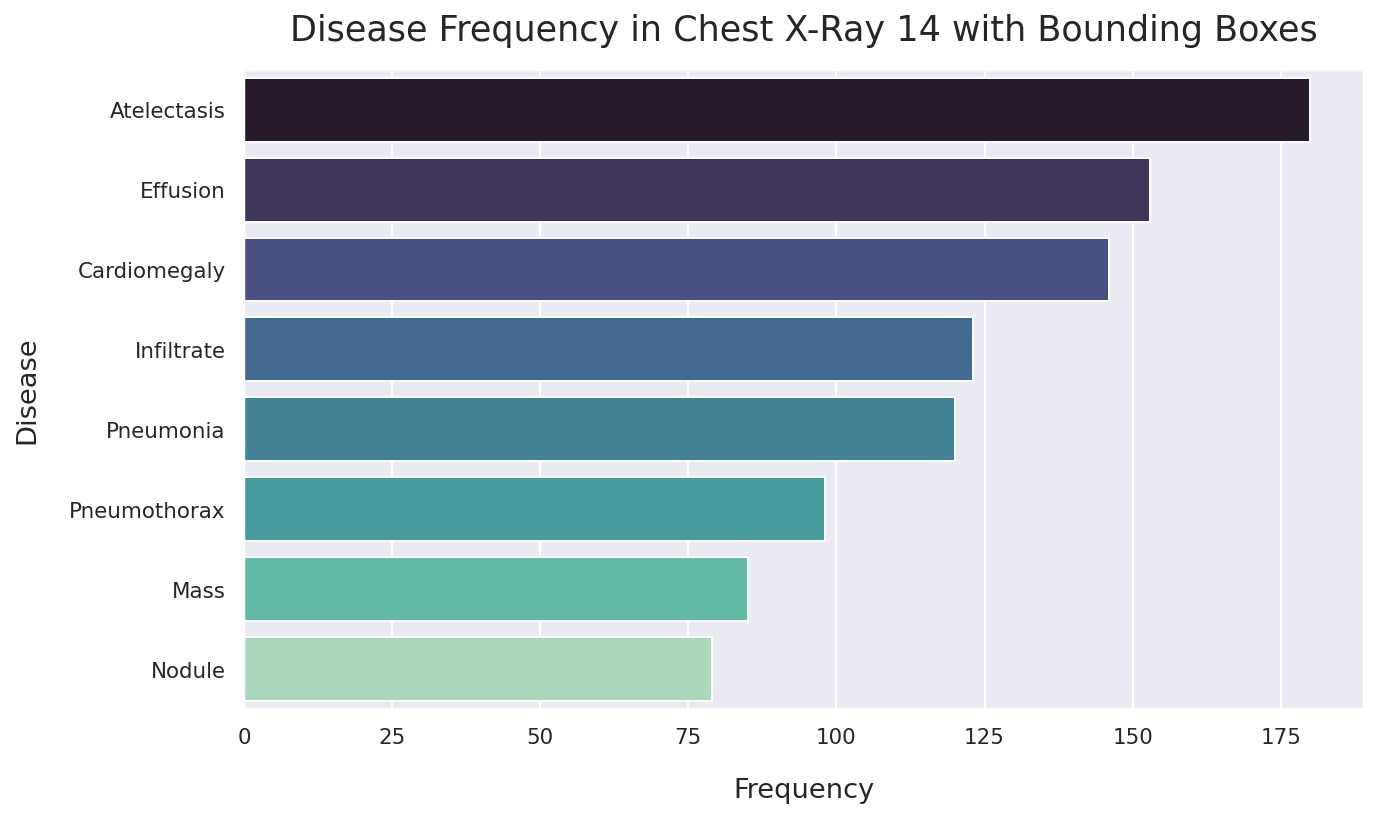

In [21]:
# Set style and color palette
sns.set_theme(style='darkgrid', palette='mako')

# Change the setting and put it in a dictionary
plot_settings = {
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 140,
    'axes.titlepad': 15,
    'axes.labelpad': 15,
    'figure.titlesize': 24,
    'figure.titleweight': 'bold',
}

# Use the dictionary variable to update the settings using matplotlib
plt.rcParams.update(plot_settings)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(y='Finding Label', data=merged_df, palette='mako', legend=False,
              order=merged_df['Finding Label'].value_counts().index)

plt.title('Disease Frequency in Chest X-Ray 14 with Bounding Boxes')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.tight_layout()  # Adjust layout to make room for the labels

# Show plot
plt.show()